In [ ]:
%matplotlib inline
import os 
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml" 
HOUSING_PATH = "datasets/housing" 
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [ ]:

def fetch_housing_data ( housing_url = HOUSING_URL , housing_path = HOUSING_PATH ): 
    if not os.path.isdir ( housing_path ):
        os.makedirs ( housing_path ) 
        tgz_path = os.path.join ( housing_path , "housing.tgz" ) 
        urllib.request.urlretrieve ( housing_url , tgz_path ) 
        housing_tgz = tarfile.open ( tgz_path ) 
        housing_tgz.extractall ( path = housing_path ) 
        housing_tgz.close ()

fetch_housing_data()

In [ ]:
%ls

In [ ]:
import pandas as pd

def load_housing_data ( housing_path = HOUSING_PATH ): 
    csv_path = os.path.join ( housing_path , "housing.csv" ) 
    return pd.read_csv ( csv_path )

In [ ]:
housing = load_housing_data()
housing.head()


In [ ]:
housing.info()

In [ ]:
housing["ocean_proximity"].value_counts()

In [ ]:
housing.describe()

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
import numpy as np

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), " train +", len(test_set), " test")

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state =42)

print(len(train_set), " train +", len(test_set), " test")


In [ ]:
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    print("counter ", counter)
    strat_train_set = housing.loc[train_index]
    print(train_index)
    strat_test_set = housing.loc[test_index]
    print(test_index)

In [ ]:
housing["income_cat"].value_counts()/len(housing)

In [ ]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [37]:
housing = strat_train_set.copy()

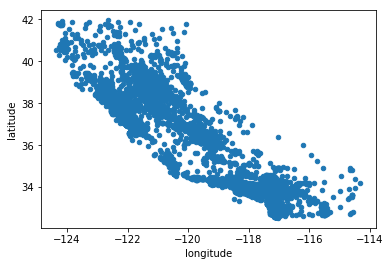

In [39]:
housing.plot(kind="scatter", x="longitude",y="latitude")
plt.show()

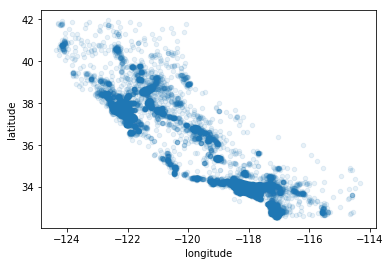

In [40]:
housing.plot(kind="scatter", x="longitude",y="latitude", alpha=0.1)
plt.show()

In [42]:
housing["population"].describe()

count    16512.000000
mean      1419.790819
std       1115.686241
min          3.000000
25%        784.000000
50%       1164.000000
75%       1719.250000
max      35682.000000
Name: population, dtype: float64

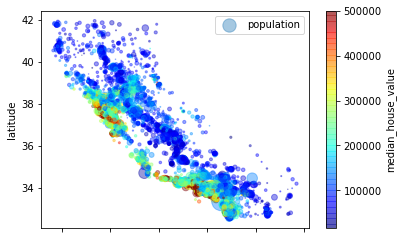

In [43]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100,
            label="population",
            c="median_house_value",
            cmap = plt.get_cmap("jet"), colorbar=True)
plt.legend()